In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [183]:
filename = "Topic_Survey_Assignment.csv"
df = pd.read_csv(filename, index_col='Unnamed: 0')
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [7]:
df.shape

(6, 3)

In [12]:
df.sort_values(by="Very interested", ascending=False, inplace=True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [16]:
df_prnt = np.round(((df/2233)*100), decimals=2)
df_prnt


,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [60]:
df_prnt.index

Index(['Data Analysis / Statistics', 'Machine Learning', 'Data Visualization',
       'Big Data (Spark / Hadoop)', 'Deep Learning', 'Data Journalism'],
      dtype='object')

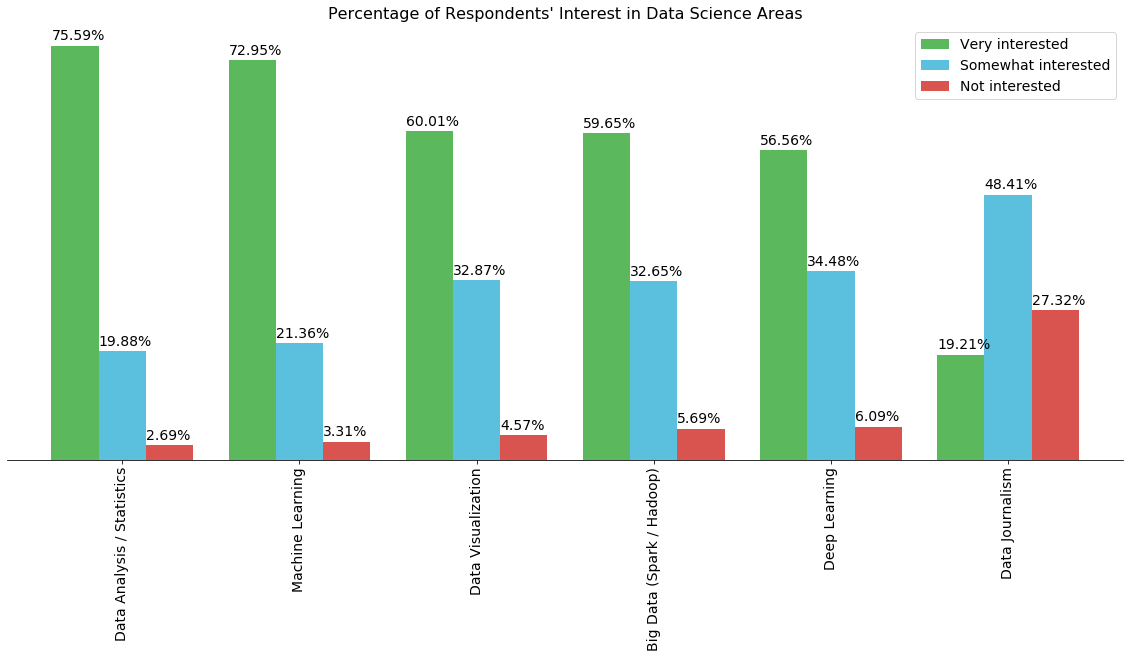

In [80]:
ax = df_prnt.plot(kind="bar", 
                  figsize=(20,8),
                  width=0.8,
                  color=["#5cb85c", "#5bc0de","#d9534f"],
                  fontsize=14
                 
                 )
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)

for i in ax.patches: 
    ax.text(i.get_x(), i.get_height() + 1 , str(i.get_height())+ "%", fontsize=14)

ax.legend(loc="upper right", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

In [116]:
crime_csv = "Police_Department_Incidents_-_Previous_Year__2016_.csv"
crime = pd.read_csv(crime_csv)
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [131]:
crime.rename(columns={'PdDistrict': "Neighborhood"}, inplace=True)

In [154]:
crime_hood = pd.DataFrame(crime["Neighborhood"].value_counts(), )
crime_hood.reset_index(inplace=True)
crime_hood.columns = ["Neighborhood", "Count"]
crime_hood

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [221]:
import folium
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [222]:
jsonfile = "san-francisco.geojson"
SFgeo = jsonfile # geojson file
SFgeo

'san-francisco.geojson'

In [223]:
!type {jsonfile}

{
  "type": "FeatureCollection",
  "crs": {
    "type": "name",
    "properties": {
      "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
    }
  },
  "features": [{
    "type": "Feature",
    "properties": {
      "OBJECTID": 1,
      "DISTRICT": "CENTRAL",
      "COMPANY": "A"
    },
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [-122.40532134644249, 37.806867516866724],
          [-122.40440122046421, 37.80885380837723],
          [-122.40438743872008, 37.80886519707406],
          [-122.40436730880846, 37.808872966044206],
          [-122.40434376667437, 37.808869624109605],
          [-122.40431429421082, 37.80881799170733],
          [-122.40394067997407, 37.80876198999871],
          [-122.40392016838871, 37.808754877186864],
          [-122.40390555965932, 37.808734021463344],
          [-122.40390814512642, 37.80871288836611],
          [-122.40471878715235, 37.80696905969842],
          [-122.4039597318324, 37.80657809724],
          [-122.4027

            [-122.36122458793021, 37.81036633098321],
            [-122.36123515112097, 37.81035025250502],
            [-122.36121473455187, 37.81033370394952],
            [-122.36120648448026, 37.81030638624285],
            [-122.36118612847726, 37.810213714763734],
            [-122.36066199596358, 37.81028636418545],
            [-122.36035660669492, 37.81093259315244],
            [-122.36025374426112, 37.81090560229785],
            [-122.36058491790578, 37.810208893982605],
            [-122.36115711830462, 37.810135486361624],
            [-122.3611199144574, 37.810000160929526],
            [-122.36114521142986, 37.809990223920565],
            [-122.36113606183979, 37.809894991204075],
            [-122.36100136144233, 37.80811833134343],
            [-122.36100392815946, 37.80811015204767],
            [-122.36101351248209, 37.80810284753914],
            [-122.36102769267106, 37.80809904695492],
            [-122.36139716125379, 37.808091428135036],
            [-122.3614

          [-122.40554675681791, 37.762436144530646],
          [-122.40530952565794, 37.762956565101646],
          [-122.40515786907922, 37.763325700649055],
          [-122.40501014549608, 37.76384826829787],
          [-122.40497550288315, 37.76417287456312],
          [-122.40497253815339, 37.764634836572355],
          [-122.4048140418927, 37.765065914546916],
          [-122.4048274708948, 37.765483065145254],
          [-122.40483650484795, 37.76583536065695],
          [-122.40483621916783, 37.76594528763392],
          [-122.4047702748633, 37.76605976722158],
          [-122.40449511466335, 37.766075448242574],
          [-122.40380209217487, 37.76611532731989],
          [-122.40352549711032, 37.76613174580518],
          [-122.40283554444672, 37.76617396002442],
          [-122.40255894894959, 37.76619037621432],
          [-122.401873505059, 37.76622989975334],
          [-122.40197253510054, 37.767336429698055],
          [-122.40199969737336, 37.767515264120306],
        

          [-122.4971096149957, 37.78748755749846],
          [-122.49705392431315, 37.78745931783307],
          [-122.49701599072638, 37.787458339060244],
          [-122.49692399902182, 37.78743918076948],
          [-122.49687650730687, 37.78737819643343],
          [-122.49680813047985, 37.787350892120685],
          [-122.49675393505557, 37.787369824003925],
          [-122.4967270251709, 37.78733983572461],
          [-122.496683247164, 37.78735787087464],
          [-122.4966595951382, 37.787322423155565],
          [-122.49654685911852, 37.787283079534966],
          [-122.49652570670489, 37.78729838960019],
          [-122.49648552929196, 37.78730681607979],
          [-122.49644276962285, 37.78731127442184],
          [-122.49634757448527, 37.78732572499817],
          [-122.49627671915107, 37.7873328693565],
          [-122.49609010429255, 37.78741619218795],
          [-122.49606989453349, 37.78744968045836],
          [-122.49604164449842, 37.787445835307444],
          [-

          [-122.44746632394533, 37.799389269850934],
          [-122.44761399557525, 37.80032103948769],
          [-122.44769613666054, 37.80083534016039],
          [-122.44788742602724, 37.80135295573872],
          [-122.44808601033299, 37.80137354487283],
          [-122.44826110890199, 37.80140403492352],
          [-122.44839402867456, 37.801430452587816],
          [-122.44856975324659, 37.80148477670307],
          [-122.44872732968395, 37.80153463141607],
          [-122.44885499287354, 37.801589749303844],
          [-122.44896500876547, 37.80165946552243],
          [-122.4490993058005, 37.80173831835101],
          [-122.44923410371551, 37.801836238411305],
          [-122.44934462071582, 37.80192502188174],
          [-122.44945563867228, 37.80203287279547],
          [-122.4495799242744, 37.80218819380583],
          [-122.44968631232021, 37.80234857956881],
          [-122.44976917021778, 37.802528430152464],
          [-122.44982787233093, 37.80270391122145],
         

In [224]:
SFgeo

'san-francisco.geojson'

In [225]:
crime_hood

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [226]:
sanfran_map.choropleth(
    geo_data=SFgeo,
    data=crime_hood,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map